In [2]:
import pandas as pd
import os

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
metadata_df = pd.read_csv("/Users/nipunbatra/w/dataport-metadata.csv",index_col=0)

In [6]:
store = pd.HDFStore("/Users/nipunbatra/wiki-all.h5")

In [7]:
from collections import Counter
counter_dict = {}
for city in ["San Diego", "Boulder", "Austin", "Houston", "Dallas"]:
    print city
    only_city_df = metadata_df[metadata_df['city'] == city]
    counter_dict[city] = Counter()
    for building in only_city_df.index:
        try:
            counter_dict[city].update(store['/%d' %building].resample("1M")['use'].index)
        except:
            pass
    counter_dict[city] = pd.Series(counter_dict[city])
    
    


San Diego
Boulder
Austin
Houston
Dallas


In [8]:
import sys
sys.path.append("../code/")

In [9]:
from common_functions import tableau20blind, format_axes, latexify

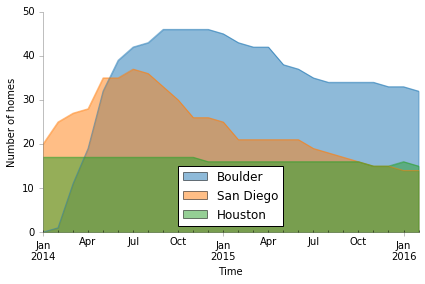

In [10]:

pd.DataFrame(counter_dict)["2014":][["Boulder", "San Diego", "Houston"]].plot(kind="area", stacked=False, 
                                                                              color=tableau20blind[::2])
format_axes(plt.gca())
plt.xlabel("Time")
plt.ylabel("Number of homes")
plt.tight_layout()
plt.savefig("../results/large_dataset_cities.png", bbox_inches="tight")
plt.savefig("../results/large_dataset_cities.pdf", bbox_inches="tight")

In [11]:
stream_counter_dict = {}
for city in ["San Diego", "Boulder", "Austin", "Houston", "Dallas"]:
#for city in ["San Diego"]:
    print city
    only_city_df = metadata_df[metadata_df['city'] == city]
    stream_counter_dict[city] = Counter()
    for building in only_city_df.index:
        try:
            stream_counter_dict[city].update(store['/%d' %building].columns)
        except:
            pass
    #stream_counter_dict[city] = pd.Series(counter_dict[city])
    
    

San Diego
Boulder
Austin
Houston
Dallas


In [12]:
streams_df = pd.DataFrame(stream_counter_dict)

In [13]:
import seaborn as sns

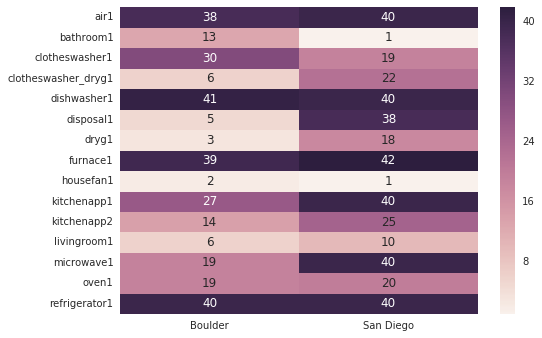

In [14]:
sns.heatmap(streams_df[["Boulder", "San Diego"]].dropna().drop("use"), annot=True)
plt.savefig("../results/large_dataset_cities_streams.pdf", bbox_inches="tight")
plt.savefig("../results/large_dataset_cities_streams.png", bbox_inches="tight")

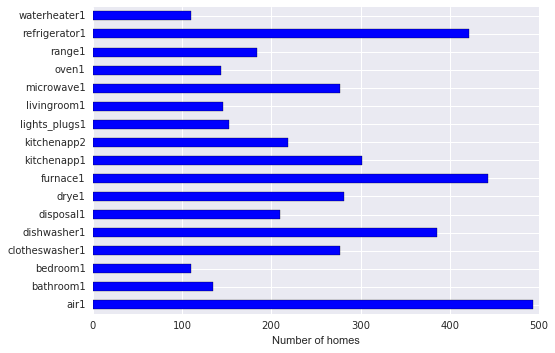

In [15]:
austin = streams_df["Austin"]
austin[austin>100].drop('use').plot(kind="barh")
plt.xlabel("Number of homes")
plt.savefig("../results/large_dataset_austin_streams.pdf", bbox_inches="tight")
plt.savefig("../results/large_dataset_austin_streams.png", bbox_inches="tight")

In [16]:
!ls ~/git/nilm-actionable/data/total/

audits_2011.csv                   audits_2013_duct_leakage_eval.csv dataport-metadata.csv             survey_2013.csv
audits_2013_appliances.csv        audits_2013_main.csv              survey_2011_all_participants.csv


In [17]:
columns_to_use = {
    'survey_2011_all_participants.csv': [
        'males',
        'females',
        'age_under_5',
        'age_6_to_12',
        'age_13_to_18',
        'age_19_to_24',
        'age_25_to_34',
        'age_35_to_49',
        'age_50_to64',
        'age_over_65',
        'highest_education',
        'income_range',
        ],
    'survey_2013.csv': [
        'number_floors',
        'house_num_rooms',
        'house_square_feet',
        'sex_males',
        'sex_females',
        'residents_under_5',
        'residents_6_to_12',
        'residents_13_to_18',
        'residents_19_to_24',
        'residents_25_to_34',
        'residents_35_to_49',
        'residents_50_to_64',
        'residents_older_65',
        'education_level',
        'total_annual_income',
        ],
    'audits_2011.csv': ['no_bedrooms', 'year_built'],
    'audits_2013_main.csv': ['Number_of_Floors__c',
                             'Number_of_Bedrooms__c',
                             'Construction_Year__c'],
    'dataport-metadata.csv':['house_construction_year',
                             'total_square_footage']
    }




In [18]:
metadata_dataframes = {filename: pd.read_csv('/Users/nipunbatra/git/nilm-actionable/data/total/%s' %filename) for filename in columns_to_use.keys()}

### Finding how much metadata we have for each city

In [19]:
metadata_dataframes.keys()

['dataport-metadata.csv',
 'survey_2011_all_participants.csv',
 'survey_2013.csv',
 'audits_2011.csv',
 'audits_2013_main.csv']

In [22]:
counter_dict = {}
out = {}
for city in ["San Diego", "Boulder", "Austin", "Houston", "Dallas"]:
#for city in ["San Diego"]:
    out[city] = {}

    
    print city
    only_city_df = metadata_df[metadata_df['city'] == city]
    counter_dict[city] = Counter()
    for building in only_city_df.index[:]:
        try:
            building=int(building)
            out[city][building] = {}
            for metadata_filename, metadata_columns in columns_to_use.iteritems():
                
                mdf = metadata_dataframes[metadata_filename]
                
                mdf_building = mdf[mdf.dataid==building].head(1)[metadata_columns]
                
                out[city][building].update(mdf_building.squeeze().to_dict())
                
                
                
            
        except Exception, e:
            print e
    
    

San Diego
Boulder
Austin
Houston
Dallas


In [23]:
common_columns = {'year_built':['year_built','house_construction_year','Construction_Year__c'],
                 'area':['house_square_feet','total_square_footage'],
                 'num_floors':['Number_of_Floors__c','number_floors'],
                 'num_bedrooms':['Number_of_Bedrooms__c','no_bedrooms'],
                 'num_males':['males','sex_males'],
                 'num_females':['females','sex_females'],
                 'age_13_to_18':['age_13_to_18','residents_13_to_18'],
                 'age_19_to_24':['age_19_to_24','residents_19_to_24'],
                  'age_25_to_34':['age_25_to_34','residents_25_to_34'],
                  'age_35_to_49':['age_35_to_49','residents_35_to_49'],
                  'age_50_to_64':['age_50_to64','residents_50_to_64'],
                  'age_over_65':['age_over_65','residents_older_65'],
                  'age_6_to_12':['age_6_to_12','residents_6_to_12'],
                  'age_under_5':['age_under_5','residents_under_5'],
                  'education_level':['education_level','highest_education'],
                  'income_range':['income_range','total_annual_income']
                  
                  
                 }

In [24]:
odfs = {}
for city in ["San Diego", "Boulder", "Austin"]:
    print city
    odfs[city] = pd.DataFrame(out[city])
    odfs[city] = odfs[city].replace([{}], [None])
    odf = odfs[city]
    odft = odf.T
    out_new = {}
    for common_key, common_list_columns in common_columns.iteritems():
        out_new[common_key]={}
        for home in odft.index:

            num_columns = len(common_list_columns)
            num_null = odft.ix[home][common_list_columns].isnull().sum()
            if num_columns==num_null:
                out_new[common_key][home]=None
            else:
                # Choose first not null
                out_new[common_key][home]=odft.ix[home][common_list_columns].dropna().head(1).values[0]

        for col in common_list_columns:

            odft = odft.drop(col, axis=1)
        odft[common_key] = pd.Series(out_new[common_key])
    odfs[city]=odft.T
    #odfs[city]=odft.T.notnull().sum(axis=1)

    

San Diego
Boulder
Austin


In [25]:
odfs['San Diego'].ix['area'].to_dict()

{54: nan,
 203: 1555.0,
 527: nan,
 1199: nan,
 1284: nan,
 1450: 1575.0,
 1524: 2050.0,
 1731: 1555.0,
 2031: nan,
 2235: nan,
 2354: 2180.0,
 2412: 1800.0,
 2606: 1390.0,
 3687: nan,
 3864: 1464.0,
 3938: 1120.0,
 4083: nan,
 4095: nan,
 4237: nan,
 4329: nan,
 4495: 1087.0,
 4761: 1580.0,
 4934: 1547.0,
 5009: 1088.0,
 5387: 1547.0,
 5909: 670.0,
 5938: 1476.0,
 6152: nan,
 6196: nan,
 6231: nan,
 6268: nan,
 6377: nan,
 6429: nan,
 6497: 2050.0,
 6547: 1547.0,
 6689: nan,
 6770: nan,
 7062: 1400.0,
 7114: 1401.0,
 7409: nan,
 7422: 2110.0,
 7639: nan,
 8061: 1600.0,
 8168: 1452.0,
 8342: 1401.0,
 8574: 1400.0,
 8733: nan,
 8886: nan,
 9197: nan,
 9213: nan,
 9370: 2050.0,
 9585: nan,
 9612: 1555.0,
 9711: nan,
 9775: 2300.0,
 9836: nan,
 9995: nan}

In [37]:
odfs['Boulder'].ix['area'].to_dict()

{232: 2228.0,
 516: 2379.0,
 547: 2920.0,
 698: 2370.0,
 879: nan,
 1350: 2332.0,
 1766: 2564.0,
 1879: 4123.0,
 2144: 1539.0,
 2196: nan,
 2523: 4306.0,
 2824: 832.0,
 2903: 3049.0,
 2931: 1143.0,
 3104: 1539.0,
 3353: 2207.0,
 3659: 2300.0,
 3734: 4673.0,
 4147: nan,
 4499: 2438.0,
 4601: nan,
 4703: 1985.0,
 4830: 3971.0,
 4920: 3311.0,
 4974: 2393.0,
 5187: 3839.0,
 5400: nan,
 5648: 928.0,
 5652: 2166.0,
 5904: 2352.0,
 5954: 1662.0,
 6083: 1480.0,
 6148: 2722.0,
 6174: 2124.0,
 6264: 1030.0,
 6282: 1216.0,
 6800: 3199.0,
 6888: 3409.0,
 6956: 832.0,
 7001: 2047.0,
 7208: 1176.0,
 7213: 1400.0,
 7818: 928.0,
 8273: 6147.0,
 8368: 2055.0,
 8395: 1559.0,
 8555: nan,
 8622: 1032.0,
 8676: 2353.0,
 8729: 2360.0,
 8862: 928.0,
 9085: 1763.0,
 9142: 2277.0,
 9156: 1589.0,
 9229: 2424.0,
 9341: 2958.0,
 9818: 2157.0,
 9958: 1176.0}

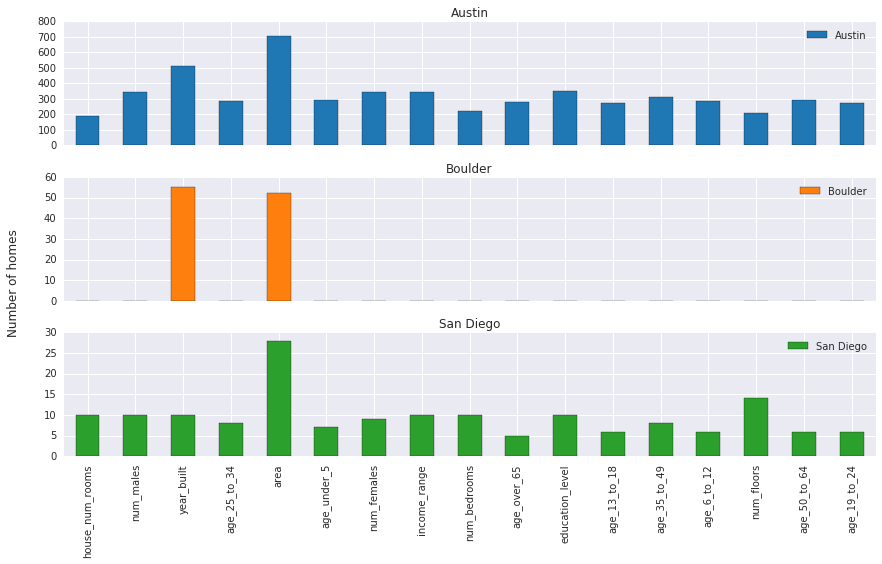

In [22]:
pd.DataFrame(odfs).plot(kind="bar", color=tableau20blind[::2], subplots=True, figsize=(12,8))
fig = plt.gcf()
fig.text(-0.02, 0.5, "Number of homes", va='center', rotation='vertical')

plt.tight_layout()
plt.savefig("../results/metadata.png", bbox_inches="tight")
plt.savefig("../results/metadata.pdf", bbox_inches="tight")

In [27]:
city="Boulder"
metadata_df[metadata_df['city'] == city][['egauge_min_time','egauge_max_time']]

,egauge_min_time,egauge_max_time
dataid,,
4974,6/25/14 0:00,2/20/16 3:42
7213,NaN,NaN
6282,NaN,NaN
3659,NaN,NaN
9229,NaN,NaN
2144,5/23/14 19:00,10/12/14 18:59
698,4/10/14 0:00,6/2/15 2:59
1350,6/25/14 0:00,1/15/16 5:59
1766,3/20/14 0:00,2/20/16 2:59


In [39]:
odfs['San Diego']

,54,203,527,1199,1284,1450,1524,1731,2031,2235,...,8886,9197,9213,9370,9585,9612,9711,9775,9836,9995
house_num_rooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN
num_males,None,None,None,None,None,None,None,1,None,None,...,None,None,None,None,None,None,None,None,None,None
year_built,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,NaN,NaN
age_25_to_34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
area,NaN,1555,NaN,NaN,NaN,1575,2050,1555,NaN,NaN,...,NaN,NaN,NaN,2050,NaN,1555,NaN,2300,NaN,NaN
age_under_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
num_females,None,None,None,None,None,None,None,1,None,None,...,None,None,None,None,None,None,None,1,None,None
income_range,None,None,None,None,None,None,None,$75-000 - $99-999,None,None,...,None,None,None,None,None,None,None,$75-000 - $99-999,None,None
num_bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
age_over_65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [38]:
odfs_austin = odfs['Austin'].ix[['house_num_rooms','num_males','num_females','area']].T.dropna()

In [43]:
odfs_austin = odfs_austin.replace({'5 or more':5})
odfs_austin = odfs_austin.replace({"None":0})

In [46]:
odfs_austin = odfs_austin.astype('float64')

In [51]:
odfs_austin["num_occupants"] = odfs_austin.num_females+odfs_austin.num_males

In [53]:
odfs_austin = odfs_austin.drop("num_males",1)
odfs_austin = odfs_austin.drop("num_females",1)

In [56]:
odfs_austin = odfs_austin.query('num_occupants>0')

In [59]:
odfs_austin.to_csv("../data/input/austin_md.csv")